<a href="https://colab.research.google.com/github/AnhMcConnell/Tensorflow-2-and-Keras-Deep-Learning-Bootcamp/blob/main/Real_Images_Files_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from matplotlib.image import imread

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cell_images.zip to cell_images.zip


In [ ]:
!unzip cell_images.zip

Streaming output truncated to the last 5000 lines.
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_245.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_251.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_261.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_41.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_54.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_57.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_85.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_104.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_109.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_128.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_142.pn

In [ ]:
import os

In [ ]:
data_dir = 'cell_images'

In [ ]:
os.listdir(data_dir)

['test', 'train']

In [ ]:
test_path = data_dir+'/test/'
train_path = data_dir+'/train/'

In [ ]:
test_path

'cell_images/test/'

In [ ]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [ ]:
os.listdir(train_path)

['uninfected', 'parasitized']

In [ ]:
os.listdir(train_path+'parasitized')[0]

'C159P120ThinF_IMG_20151115_191301_cell_229.png'

In [ ]:
para_cell = train_path+'parasitized'+'/C159P120ThinF_IMG_20151115_191301_cell_229.png'

In [ ]:
para_cell

'cell_images/train/parasitized/C159P120ThinF_IMG_20151115_191301_cell_229.png'

In [ ]:
# Read the image by imread -> it will return an array
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
# Check the shape of an image with imread
imread(para_cell).shape

(145, 121, 3)

In [ ]:
# As we can see the image is a color image( 3 tensor at the end of shape), shape by 145 by 121

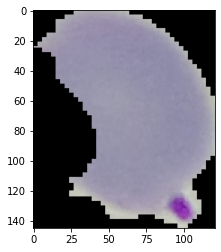

In [ ]:
plt.imshow(imread(para_cell))

In [ ]:
# This is a infected image cell as we can see the dark spot in the low right area of the image

In [ ]:
# Lets explore the uninfected cell and see what it looks like, using the same step as above

In [ ]:
os.listdir(train_path+'uninfected')[0]


'C171P132ThinF_IMG_20151119_153347_cell_70.png'

In [ ]:
uninfected_cell = train_path+'uninfected'+'/C171P132ThinF_IMG_20151119_153347_cell_70.png'

In [ ]:
uninfected_cell

'cell_images/train/uninfected/C171P132ThinF_IMG_20151119_153347_cell_70.png'

In [ ]:
imread(uninfected_cell).shape

(145, 142, 3)

In [ ]:
# This image has shape of 145* 142, also a color image. Lets see how it looks

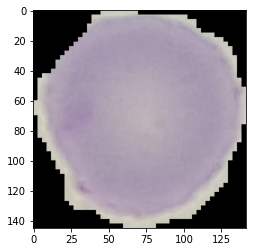

In [ ]:
plt.imshow(imread(uninfected_cell))

In [ ]:
# so clearly it does not have any spot there, it's a uninfected image cell.

Now, we can check how many images in the files

In [ ]:
# First , training set parasitized
len(os.listdir(train_path+'parasitized'))

12480

In [ ]:
# test set
len(os.listdir(test_path+'parasitized'))

1300

In [ ]:
# check training uninfected
len(os.listdir(train_path+'uninfected'))

12480

In [ ]:
# test uninfected
len(os.listdir(test_path+'uninfected'))

1300

In [ ]:
# ok, for training and test set we have same amount of both features parasitized and uninfected which is nice!


In [ ]:
# now, Lets check at the average shape, as this data set is a real image file, it's not going to be the same image shape from the data

In [ ]:
# Set up 2 lists:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
  img = imread(test_path+'uninfected/'+image_filename)
  d1, d2, color = img.shape
  dim1.append(d1)
  dim2.append(d2)
  

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


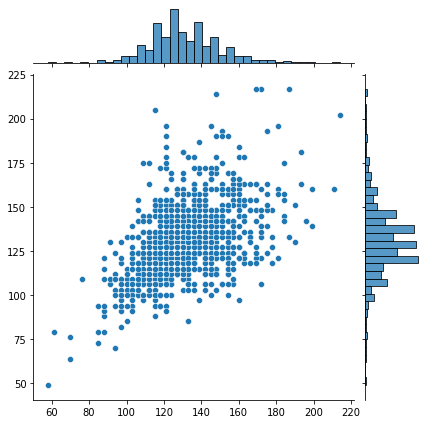

In [ ]:
# we can visualize these 2 dimensions by ploting them
sns.jointplot(dim1, dim2)

In [ ]:
# For CNN, It's important to reshape all the images into 1 average shape because the CNN is not going to be abel to train on images of various sizes.
# As we can see from the plot above, our dataset has various dimensions , some are 60 or even 50 compare to some ae 220. So in order to do this, we will make sure to resize images into same size by taking average of all images.

In [ ]:
np.mean(dim1)

130.92538461538462

In [ ]:
np.mean(dim2)

130.75

In [ ]:
# so it makes sense here to choose the dimensions for our images as shape (130,130,3)

In [ ]:
# From here, we will feed our CNN  with this shape
imamge_shape = (130,130,3)

In [ ]:
# Note here, later when we prepare the data for the model, we will need to resize everything to these dimensions. 
# If a smaller photo, we can basically add padding so that it reaches these dimensions. And if for larger photo , we can shrink or crop the image into these dimensions.

Next,  Image manipulation! 

In [ ]:
# So normally when we feed the image with size 28*28 (MNIST-gray scale), and then GFARs is 32*32(color image)
# And even the small expansion from 28*28 to 32*32 is already a huge expansion in the amount of data. 
28*28

784

In [ ]:
32*32*3

3072

In [ ]:
# when reach color channel, our file here is 130*130*3 is a lot larger as we read them(datapints)
130*130*3

50700

In [ ]:
# So we will not be able to just feed in everything at once, instead, we will select BATCHES for our images. 
# By manipulating and performing transformations on our images (like ROTATION, RESIZING, SCALING, ETC...) and to begin this process, we will use tensorflow lib

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# To understand about this ImageDataGenerator , we can call for help
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [ ]:
# create an instance of image generator
# Note that we can choose all different parameters depends on our dataset, now we have 30000 images, half of the size of MNIST dataset we delt with before. We can expanse the amount of images. 
# For instance, if we deal with the blobs (like circular, ex: red blood cells) they can be stretched or squezzed . 
# But then if you are dealing with something like facial data, you dont want to squeezing or rotating faces so much 180 degrees that they are in unrealistic positions.
# checking rescale by devide 1/ 255. In case the image already rescale, we can check by call max, min functions of that image. Ex: para_cell.max(), para_cell.min(), if it's in range (0, 1)
image_generator = ImageDataGenerator(rotation_range=20,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True,
                                     fill_mode='nearest') # Nearest is how we are going to do with missing data,  if we do stretching our image, how are we going to fill that space ? : leave it blank? or padding of zeros? or going to take the nearest pixel values to it and then stretch it out with those pixel values.

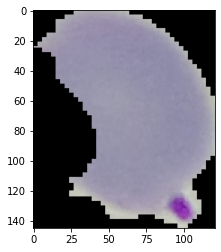

In [ ]:
plt.imshow(imread(para_cell))

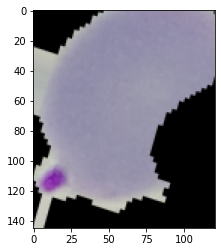

In [ ]:
# Lets see the image generator applies to our para cell image based on all conditions we gave in our image generator object.
para_img = imread(para_cell)
plt.imshow(image_generator.random_transform(para_img))

In [ ]:
# Ok, through the generator , we obviously can see that the image stretched out, it filled the missing values with the nearest pixel value. ANd note that, the pic is also rotated from right now to left side .

In [ ]:
# So now we can randomly transform these images, we can essentially augment our dataset. 
# We are no longer restricted to just this singlel image from the cell, we can randomly transform this many times over. Look at below:

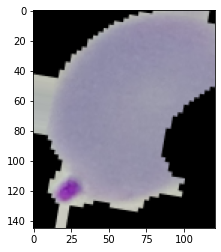

In [ ]:
plt.imshow(image_generator.random_transform(para_img))

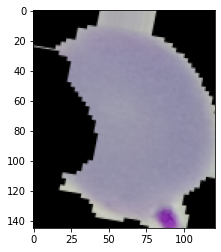

In [ ]:
plt.imshow(image_generator.random_transform(para_img))

In [ ]:
# This is a way of artiifcially expanding our image dataset. Recall we have about less than 30000 images
# in our dataset, now with this random transformation  we could do a random transformation on lal those images and 
# double size our dataset. Keep in mind this is a powerful tool for a small dataset. 


In [ ]:
# Now, how do we set up our directories to flow batches from a directory? 

In [ ]:
image_generator.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.



In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

  Image Data Folder
  
    Class 1
      0.jpg
      1.jpg
      ...


    Class 2
      0.jpg
      1.jpg
      ...
      ...
    Class n


In [ ]:
# So that's requirement otherwise it won't work. SO how do we access these classes:
os.listdir(train_path)

['uninfected', 'parasitized']

In [ ]:
# So this is how the flow from directory immediately understand that we have 2 classes based on 2 folders inside of our train path list


In [ ]:
image_generator.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [ ]:
# Similarly for test set, we also have 2 classes with total 2600 images

In [ ]:
os.listdir(test_path)

['uninfected', 'parasitized']

### generate Images from ImageDataGenerator

In [ ]:
# Create model
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, MaxPool2D, Flatten, Conv2D, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=imamge_shape, activation='relu')) # Important note hee we have to chooose the input_shape as avarage shape that we defined earlier. 
model.add(MaxPool2D(pool_size=(2,2))) # (2,2) is default, we can play around with these shape

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=imamge_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# Add more filters = 64 because we have more CNN in hidden layers. 
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=imamge_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2))) 

model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5)) # Turn off half of the neurons randomly to prevent overfitting

model.add(Dense(1, activation='sigmoid')) 
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [ ]:
# To pick the right amount of epochs to train:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
# To choose batch size, It's pretty typical to choose something in the power of 2 so for instnace:
# 2 to the power of 2 is 4, 4 to the power of 2 is 16, and the larger your hardware the larger the batch size you canprobaly chose
# The smaller the batch size, the longer the train time takes because you are fitting in less images at a time. 

batch_size = 16

In [ ]:
train_img_gen = image_generator.flow_from_directory(train_path, 
                                                    target_size=imamge_shape[:2], # target size is (width, height)
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary')

Found 24958 images belonging to 2 classes.


In [ ]:
test_img_gen = image_generator.flow_from_directory(test_path, 
                                                    target_size=imamge_shape[:2], # target size is (width, height)
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                   shuffle=False) 
# Note, during training, we can set shuffle = True (as default already), but for Test data, we should not shuffle and do not shuffle--> why?
# Because if we shuffle, our lables will get shuffles and from actual featurepoint.

Found 2600 images belonging to 2 classes.


In [ ]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [103]:
results = model.fit_generator(train_img_gen, epochs=20,
                              validation_data=test_img_gen,
                              callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1560/1560 [==============================] - 792s 507ms/step - loss: 3.7326 - accuracy: 0.5324 - val_loss: 0.6906 - val_accuracy: 0.5627
Epoch 2/20
1560/1560 [==============================] - 786s 504ms/step - loss: 0.6839 - accuracy: 0.5676 - val_loss: 0.6801 - val_accuracy: 0.5669
Epoch 3/20
1560/1560 [==============================] - 783s 502ms/step - loss: 0.6782 - accuracy: 0.5837 - val_loss: 0.6721 - val_accuracy: 0.5865
Epoch 4/20
1560/1560 [==============================] - 774s 496ms/step - loss: 0.6728 - accuracy: 0.5914 - val_loss: 0.6683 - val_accuracy: 0.6012
Epoch 5/20
1560/1560 [==============================] - 771s 494ms/step - loss: 0.6770 - accuracy: 0.5989 - val_loss: 0.6624 - val_accuracy: 0.6162
Epoch 6/20
 220/1560 [===>..........................] - ETA: 10:33 - loss: 0.6557 - accuracy: 0.6304

KeyboardInterrupt: ignored

In [104]:
from tensorflow.keras.models import load_model

In [106]:
uploaded_model = files.upload()

Saving malaria_detector.h5 to malaria_detector.h5


In [107]:
model = load_model('malaria_detector.h5')

In [109]:
# Evaluate the model
model.evaluate_generator(test_img_gen)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[35.68989562988281, 0.8742307424545288]

In [111]:
# Check the metrics of oour model
model.metrics_names

['loss', 'accuracy']

In [112]:
# Now, we can predict 
pred = model.predict_generator(test_img_gen)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [113]:
# When the model predict, it doesnt return back the straight Class calls( 0 0r 1), but it returns  probabilites.
# So we have to look at the array for instance in this pred , it said about 97 % the image is class 1.

In [114]:
# In other hand, we can also select all the probabilities > 0.5 
predictions  = pred > 0.5


In [116]:
# It returns statement according to False is 0 and True is 1. We can do it directly pass this into our confusion matrix and classification report
len(pred)

2600

In [117]:
from sklearn.metrics import classification_report, confusion_matrix

In [118]:
# If we want to get actual classes , we can call the classes method on test image gen

In [119]:
print(classification_report(test_img_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      1300
           1       0.97      0.77      0.86      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600



In [120]:
confusion_matrix(test_img_gen.classes, predictions)

array([[1271,   29],
       [ 303,  997]])

In [125]:
# Now, lets try to predict a single image, previous we use plt amd imshow to see the image, with Keras, we can also see image by import image method 

In [122]:
para_cell

'cell_images/train/parasitized/C159P120ThinF_IMG_20151115_191301_cell_229.png'

In [123]:
from tensorflow.keras.preprocessing import image

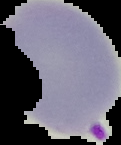

In [124]:
image.load_img(para_cell)

In [126]:
# check the type
type(image.load_img(para_cell))

PIL.PngImagePlugin.PngImageFile

In [127]:
# The different here is type of image is Image plugin , not an array like we saw above using imread.
# We can explore more of what image plugin can do with an image by setting up parameters 
single_image = image.load_img(para_cell, target_size=imamge_shape)

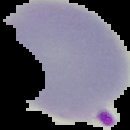

In [128]:
single_image

In [130]:
#model.summary()

In [131]:
# Now, if we got an image from the company or organization that we work for, so do we pass the image to our model to predict??
# First, we convert it to array
my_image_arr = image.img_to_array(single_image)

In [132]:
my_image_arr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [133]:
# then, we are going to check the shape of the image:
my_image_arr.shape

(130, 130, 3)

In [134]:
# we want the image shape has to be ( 1, 130, 130, 3) -> is 1 image by 130*130 and a color image(by 3 color channel)
# we can now reshape to simply resize this along the zero dimension and below is how to do that:
my_image_arr = np.expand_dims(my_image_arr, axis=0)

In [135]:
# Now, we check the shape again 
my_image_arr.shape

(1, 130, 130, 3)

In [136]:
# Now, with the correct shape, we can predict the image:
model.predict(my_image_arr)

array([[0.]], dtype=float32)

In [137]:
# what does it say? 0.
# Recall, when we have our train_img_gen , we check the class_indices 
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [138]:
# so 0 is parasitized image cell. Means the image that we want to predict is that person is infected with malaria.

In [ ]:
# We can also see clearly from the picture single_image above!
